In [1]:
#%pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Привет! Меня зовут Сысоева Вера.
    
Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные и отмечены **#ок** - всё сделано правильно; жёлтые и отмечены **#можно лучше** - есть замечания, но не критично; красные с пометкой **#ошибка** - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта.
    
Я буду поддерживать версионность комментариев, и при следующих итерациях комментарии будут выделены, как "Комментраии ревьюера - 2 (3 и.т.д.)"
    
Если у тебя есть замечания, возражения и вопросы, ты можешь писать свои комментарии, по возможности выделяй их так же цветом (например, синим), чтоб их можно было легко отделить от текста проекта. 
    
Кстати, предлагаю сразу общаться на "ты".
    
Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самостоятельно найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.
    
</div>

# Прогнозирование предпочтений в компьютерных играх

Интернет-магазине «Стримчик» продает по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт, спланировать рекламные кампании,  
а также проверить гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action и Sports разные.

## Знакомство с данными

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import scipy.stats as stats

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.columns = [x.lower() for x in df.columns]
df.year_of_release = df.year_of_release.astype('Int32')

Предоставлены данные до 2016 года.

Описание данных  


Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB  

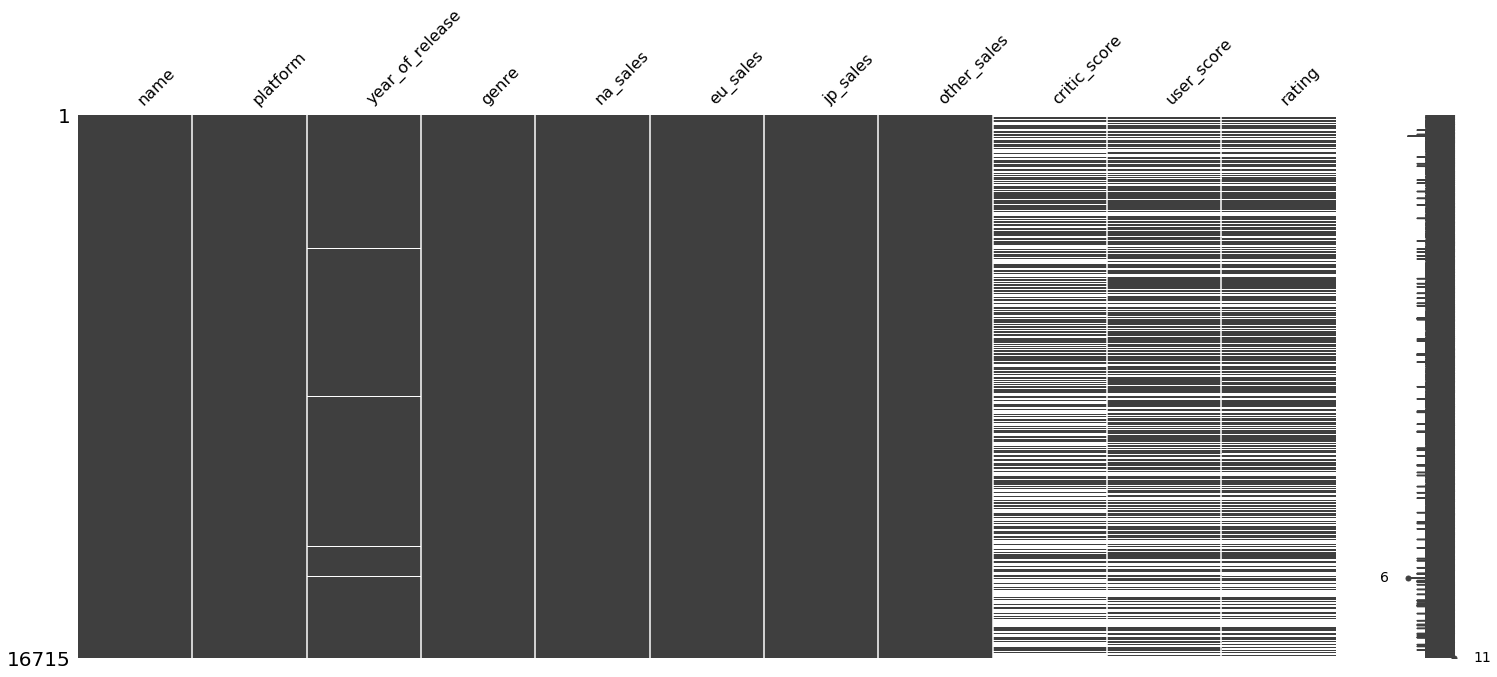

In [4]:
msno.matrix(df)

А теперь остановимся  подробнее на 3 последних колонках.  
Данные с большим количеством пропусков зачастую изначально опасно использовать, чтобы не сделать ложных выводов. В данном случае, к сожалению, мы не имеем динамики продаж игр по месяцам, но скорей всего максимальная покупательная активность проявляется в первые дни после релиза. Задача поставленная в данном анализе, предугадать покупательский ажиотаж к игре после её выхода. Узнать оценку игры до её релиза звучит как минимум не логично. А ожидание пока эта оценка сформируется не позволит получить выгоду в самый активный период спроса.  
И даже если попытаться руководствоваться оценкой толпы, а уж тем более "игровых журналистов", в большинстве случаев, она является "голосом" горстки людей которые в игры не играют.  
Рейтинг же игры, тем более с таким количеством пропусков, в мире где даже возрастные ограничения на продажу табака и алкоголя не являются значительными трудностями. Не отображает ничего кроме наличие возни, чтобы снова угодить горске людей которые не играют в игры.  

На основе всего этого, данные об оценке игры и её рейтинге в дальнейшем анализе использоваться  не будут, а понадобятся только для проверки гипотез связанных конкретно с ними

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#ок**

Хорошо, данные верно подгружены и просмотрены.
    
</div>

## Предобработка данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int32
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: Int32(1), float64(5), object(5)
memory usage: 1.4+ MB


<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#ошибка**

Под заголовком предобработки, саму предобработку ты фактически не сделал, а зря:
    
    - обработать пропуски в годах релиза
    
    - заменить тип данных в user_score
    
    - обработать пропуски в названиях и жанрах
    
    - проверить наличие дубликатов
    
</div>

In [4]:
print(f'Количество явных дубликатов в данных: {df.duplicated().sum()}')

Количество явных дубликатов в данных: 0


In [5]:
df[df.year_of_release.isna()].platform.unique()

array(['PS2', 'Wii', '2600', 'X360', 'GBA', 'PC', 'PS3', 'PS', 'PSP',
       'XB', 'GB', 'DS', 'GC', '3DS', 'N64', 'PSV'], dtype=object)

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА:</b>
    
1. После выбора для анализа актуального периода по годам и платформам в данных не остается пропусков в колонках с жанром/названием/годом релиза.  
    В пропусках с годами не представленны необходимые для анализа платформы кроме незначительного количество ПК-игр, которые практически не заметны в объемах продаж.  
2. Тип `user_score` был заменен в конце этого раздела.
</div>

<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

**#ошибка**
    
Предобработка данных и выбор актуального периода - это разные разделы. Предобрабоку надо сделать до анализа - подготовить данные для любого возможного анализа.
    
Т.е. в данном случае нужно все же сделать полную предобработку, а только потом переходиьт к анализу, в том числе к определению актуального периода

</div>

In [6]:
df = df.loc[~((df.year_of_release.isna())|(df.name.isna())|(df.genre.isna()))] 

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 3**

**#ок**

Да, пропуски в годах точно надо удалить. Пропуски в названия и жанрах можно заменить на Unknown или типа того.
    
</div>

Для обобщенных выводов добавим колонку с общемировыми продажами игры.

In [7]:
df['sales'] = df.na_sales+df.eu_sales+df.jp_sales+df.other_sales

И визуализируем развитие игровой индустрии

Text(0.5, 1.0, 'number of copies sold to the number of games released')

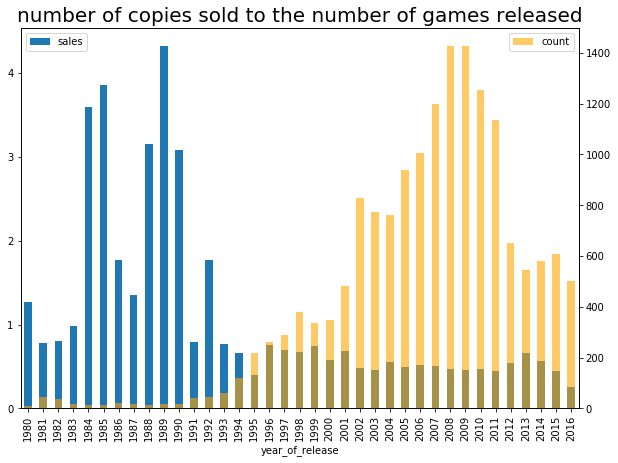

In [8]:
fig, ax1 = plt.subplots()
ax1 = df.groupby('year_of_release').sales.mean().sort_index().plot(kind='bar', figsize=(10,7))
ax2= ax1.twinx()
ax2 = df.groupby('year_of_release').name.count().sort_index().plot(kind='bar', alpha=0.6,color='orange', label='count')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('number of copies sold to the number of games released',fontsize=20)


Данные за 2016 неоправдано малы. Вероятно это связано с тем, что основная часть цикла продаж растягивается на 1-3 года. С этим же может быть связан спад 2014 и 2015 годов. Но так как показатели не сильно отличаются от средних, эти года мы оставим.  
Чтобы спрогнозировать продажи игр 2016 года необходима статистика продаж по месяцам.

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#ок**

По условию нам сказано, что данные за 2016 год не полные.

Думаю предсказывать их - это лишнее, достаточно использовать полные данные за предыдущие годы
    
</div>

В период до 2002 года игровая индустрия только зарождалась. Не было понятий об игровых приставках и игровых жанрах, играли во все что угодно на всем что угодно.   
Анализировать какую еду предпочитает голодный не имеет смысла, поэтому отбросим игры до 2002 года

<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#ошибка**

Для начала надо было выбрать платформы с наибольшими суммарными продажами и уже для них посмотреть распределение по годам
    
</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА:</b>
    
Распределение суммарных продаж на платформах по годам показано на 3 блока ниже.   
    
Если замечание в том, что в нем не хватает старых приставок, то какую информацию я упустил, убрав, например, продажи картриджей на ньютендо в 80х годах?
</div>

<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

**#ошибка**
    
На графиках ниже невозможно определить суммарные продажи по платформе.

Да, графики хороши для определения времени жизни платформ, но лидеров по продажам на них определить нельзя.

Нужно построить столбчатую диаграмму, отображающую суммарные продажи по платформам, выбрать лидеров и только для этих лидеров построить динамику.

Да, лидеров по продажам нужно оределять за все время без фильтров по датам

</div>

Для начала выбрем платформы с наибольшими суммарными продажами

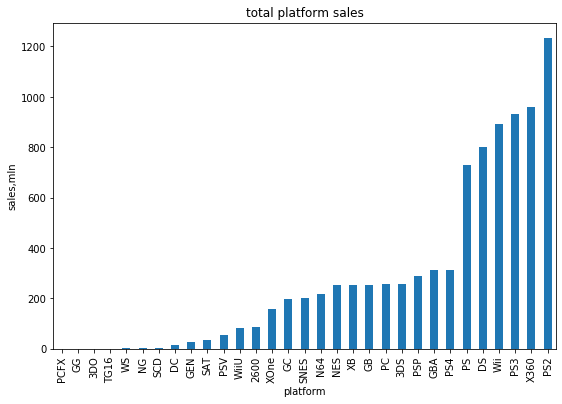

In [9]:
df.groupby('platform').sales.sum().sort_values()\
                                  .plot(kind='bar',
                                        figsize=(9,6),
                                        title='total platform sales').set(ylabel='sales,mln');

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 3**

**#ок**

Отлично. Действительно на графике явно выделяются лидеры.
    
</div>

 и  для них посмотрим распределение по годам

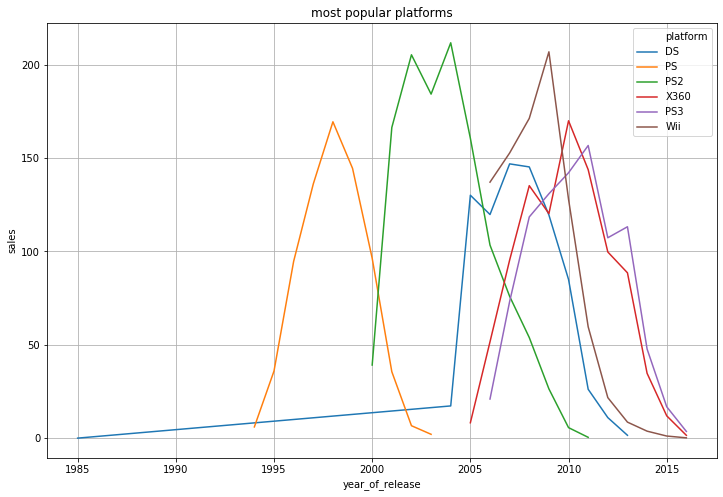

In [10]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df.query("platform in ['PS','DS','Wii','PS3','X360','PS2']")\
                    .groupby(['year_of_release', 'platform'])\
                    .sales.sum()\
                    .reset_index(),
             x='year_of_release',
             y='sales',
             hue='platform').set_title('most popular platforms')
plt.grid()

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 3**

**#ок**

Все правильно, именно для лидеров и надо посмотреть характерное время жизни.

Здесь можно было очистить явно ошибочный выброс для DS.
    
</div>

Поностальгировав вернемся к анализу.

В период до 2002 года игровая индустрия только зарождалась. Не было понятий об игровых приставках и игровых жанрах, играли во все что угодно на всем что угодно.   
Анализировать какую еду предпочитает голодный не имеет смысла, поэтому отбросим игры до 2002 года

In [11]:
df = df[df.year_of_release >= 2002]

И взглянем на актуальность приставок

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 2002.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


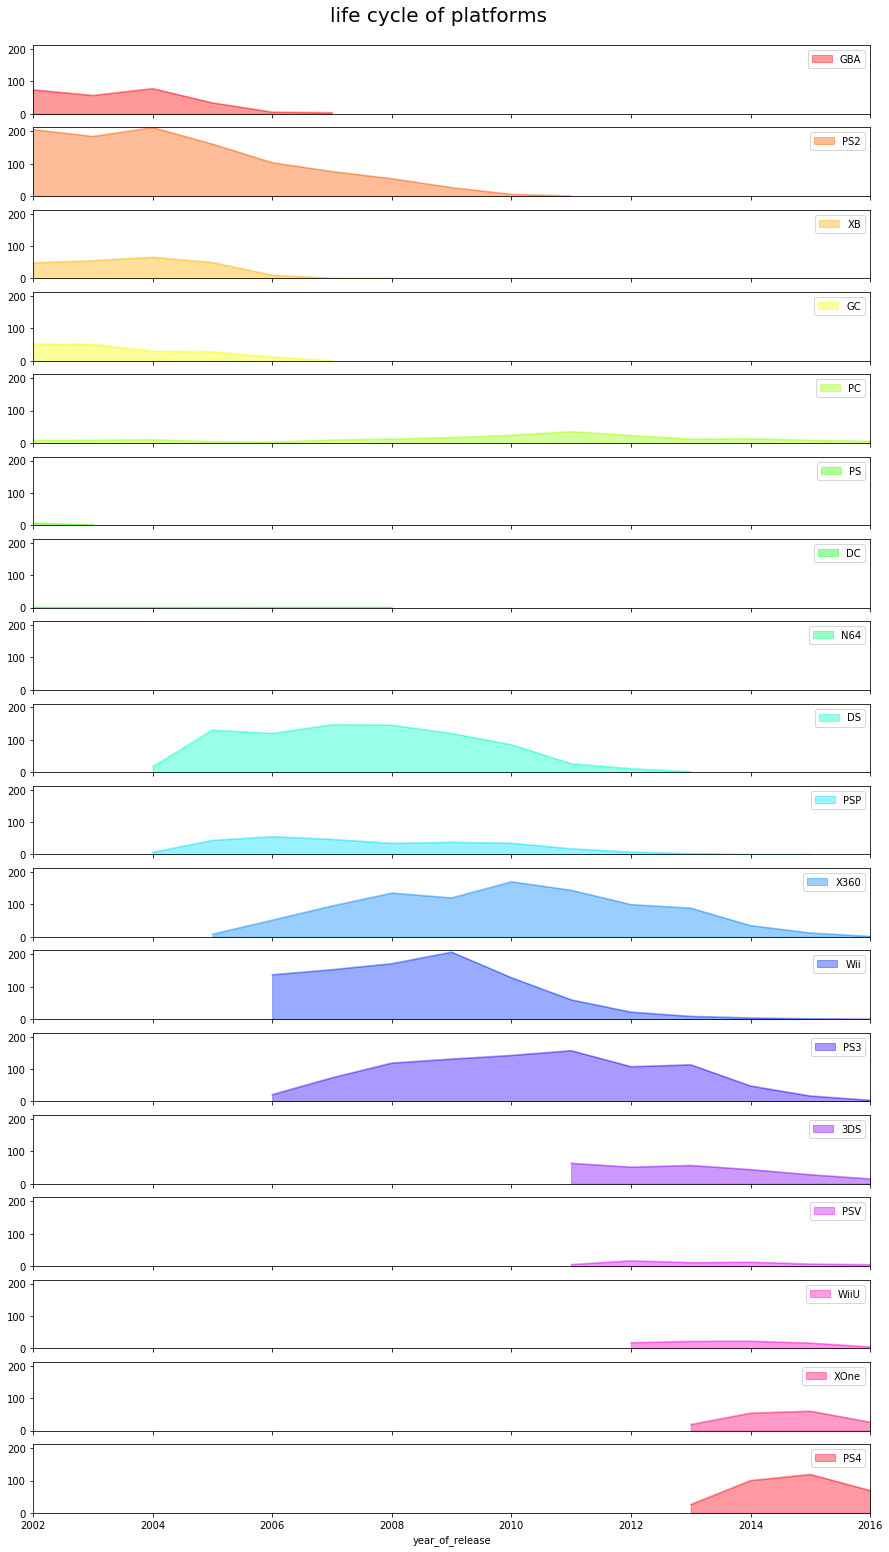

In [12]:
plt_max_sales = df.groupby(['year_of_release', 'platform']).sales.sum().max()


f, axs = plt.subplots(len(df.platform.unique()), 1,
                      figsize=(15,len(df.platform.unique())*1.5),
                      sharex=True, sharey=True)
plt.suptitle('life cycle of platforms', fontsize=20, y=0.9)

axs = axs.ravel()
for i,plform in enumerate(df.sort_values('year_of_release').platform.unique()):
  df[df.platform == plform].\
  groupby(['year_of_release'])\
  .sales.sum().reset_index()\
  .plot.area(ax=axs[i],
             x='year_of_release',
             y='sales',
             label=plform,
             color=plt.cm.get_cmap('hsv', len(df.platform.unique()))(i),
             alpha=0.4,
             ylim=(0,plt_max_sales),
             xlim=(df.year_of_release.min(),df.year_of_release.max()))

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#ок**

Хорошо, жизненый цикл платформ хорошо показан
    
</div>

У каждой платформы (за исключением бессмертного ПК) имеется цикл жизни. По истечению которого (чаще всего с выходом консоли нового поколения) платформа становится не актуальной. Исходя из этого оставим топ 5 платформ актуальные на 2016 год и будем рассматривать игры не старше года их выпуска (2013)

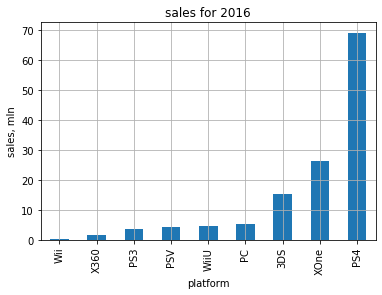

In [13]:
df[df.year_of_release == 2016].groupby('platform')\
                              .sales.sum().sort_values()\
                              .plot(kind='bar',
                                    grid=True).set(ylabel='sales, mln',
                                                   title='sales for 2016');

In [14]:
df = df.query("(year_of_release >= 2013) & (platform in ['PS4', '3DS', 'XOne', 'WiiU', 'PC'])", engine='python')

Не маловажным является "репутация" игровой серии. Существуют армии поклонников вселенных написанными фантастами. Которые готовы покупать новые игры только за их названия. 

In [15]:
df['series_name'] = df.name.apply(lambda x: x.split(':')[0])\
                           .str.replace(r"\b (['\d+IVXK]+\b|\(.+?\))", '')
# создание дополнительной колонки с названием серии игр
#на основе названия игры без римских и арабских цифр
#без уточнений в скобках и после символа ":"

In [16]:
df[df.sales > df.sales.quantile(0.9)].series_name.unique()

array(['Call of Duty', 'Pokemon/Pokemon Y', 'Grand Theft Auto',
       'Pokemon Omega Ruby/Pokemon Alpha Sapphire', 'FIFA',
       'Star Wars Battlefront', 'Super Smash Bros. for Wii U and 3DS',
       'Fallout', 'Pokemon Sun/Moon', 'Mario Kart', 'Destiny',
       'Uncharted', 'Tomodachi Life', 'The Last of Us', "Luigi's Mansion",
       'Halo', 'Splatoon', 'Super Mario 3D World', 'Minecraft',
       'Battlefield', 'Watch Dogs', 'Far Cry', 'The Witcher',
       "Assassin's Creed", 'Batman', 'Monster Hunter Ultimate', 'NBA',
       "Tom Clancy's The Division", 'Monster Hunter', 'Metal Gear Solid',
       "Assassin's Creed Syndicate", 'Yokai Watch Ganso/Honke',
       'Gears of War', 'Madden NFL', 'Super Mario Maker',
       'The Legend of Zelda', 'Animal Crossing', 'The Sims',
       'Middle-Earth', 'Titanfall', 'inFAMOUS', 'Mortal Kombat',
       'Killzone', 'Yokai Watch Shinuchi', 'Bloodborne', 'Need for Speed',
       'Yokai Watch Busters', 'New Super Luigi U',
       "Tom Clancy's R

Классифицировав доступными методами игры по сериям, в интересующей группе самых популярных игр имеется дублирование серий из-за уникальных форматов названий.  
Их обработаем вручную. 

In [17]:
s_games = ["Pokemon",
           "Mario|Luigi|Smash Bros.",
           "Assassin's Creed",
           "Lego|LEGO",
           "Monster Hunter",
           "Yokai Watch",
           "Need for Speed",
           'Final Fantasy']

for games in s_games:
  df.loc[(df.series_name.str.contains(games)), 'series_name'] = games

Ну и напоследок подготовим `user_score` к проверке гипотез

In [18]:
df.user_score = pd.to_numeric(df.user_score, errors='coerce')

<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#ошибка**

Я так понимаю в анализе ты смотришь уже портреты пользователей. Перед этим нужно

     - Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
    
     - Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

     - Соотнесите выводы с продажами игр на других платформах.

     - Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
    
</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА:</b>

1. Какую дополнительную информацию покажет ящик? Как мне кажется все необходимое по платформам я уже увидел на 2 предыдущих графиках. 
2. Свое мнение об отзывах я изложил еще в начале:
    
    *Данные с большим количеством пропусков зачастую изначально опасно использовать, чтобы не сделать ложных выводов. В данном случае, к сожалению, мы не имеем динамики продаж игр по месяцам, но скорей всего максимальная покупательная активность проявляется в первые дни после релиза. Задача поставленная в данном анализе, предугадать покупательский ажиотаж к игре после её выхода. Узнать оценку игры до её релиза звучит как минимум не логично. А ожидание пока эта оценка сформируется не позволит получить выгоду в самый активный период спроса.
И даже если попытаться руководствоваться оценкой толпы, а уж тем более "игровых журналистов", в большинстве случаев, она является "голосом" горстки людей которые в игры не играют.*  

Какой вывод позволит сделать мне оценка? Что хорошо бы узнать оценку игры за год до релиза, чтобы решить вкладывать ли деньги в рекламную компанию? 

4. Рассмотрено в конце следующего пункта
</div>

<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

**#ошибка**
    
1. Построить ящики - это задача от заказчика. Если тебе они не дадут доп. информации (хотя это спорно), то возможно они нужны заказчику для его отчетов
    
2-3. Нужно сделать качественный и количественный анализ влияния оценок на продажи, построить диаграммы, рассчитать корреляции
    
4. нет графика для общих продаж по жанрам

</div>

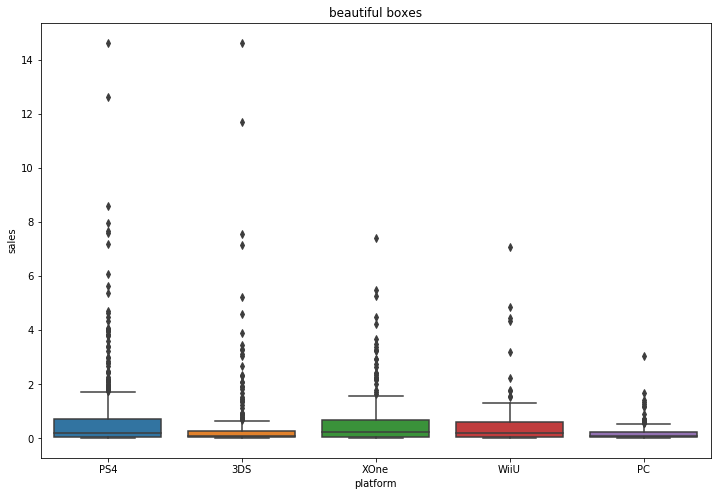

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='platform', y='sales').set_title('beautiful boxes');

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 3**

**#ок**

Ок, все верно.

Для большей наглядности можно было дополнительно отобразить ящики без выбросов, задать параметр showfliers = False.
    
</div>

По графику "ящиков с усами" можно отследить медианные продажи по платформам. Но цель наша научиться предугадывать "игры-выбросы" 

Text(0.5, 1.0, 'critics score correlation matrix')

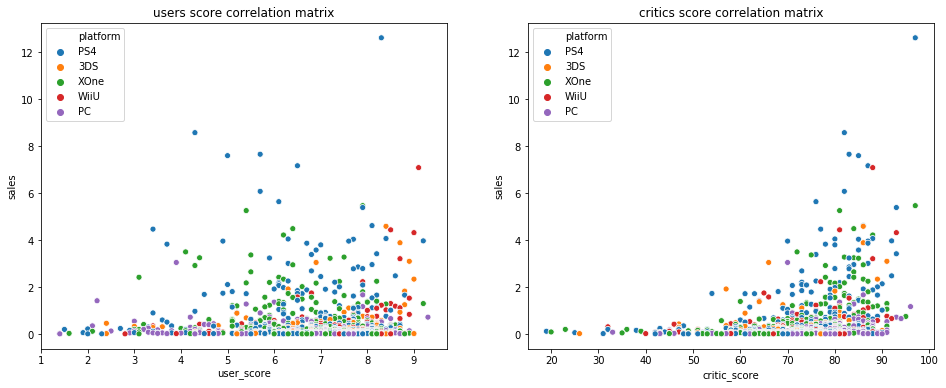

In [22]:
f, ax = plt.subplots(1, 2, figsize=(16,6))
sns.scatterplot(ax=ax[0],
                data=df,
                x='user_score',
                y='sales',
                hue='platform').set_title('users score correlation matrix')

sns.scatterplot(ax=ax[1],
                data=df,
                x='critic_score',
                y='sales',
                hue='platform').set_title('critics score correlation matrix')

In [23]:
for platform in df.platform.unique():
    print(f'\nCorrelation Matrix {platform} sales ')
    display(df.loc[df.platform==platform,['critic_score','user_score', 'sales']].corr().style.background_gradient())


Correlation Matrix PS4 sales 


,critic_score,user_score,sales
critic_score,1,0.557654,0.406568
user_score,0.557654,1,-0.0319571
sales,0.406568,-0.0319571,1



Correlation Matrix 3DS sales 


,critic_score,user_score,sales
critic_score,1,0.769536,0.357057
user_score,0.769536,1,0.241504
sales,0.357057,0.241504,1



Correlation Matrix XOne sales 


,critic_score,user_score,sales
critic_score,1,0.472462,0.416998
user_score,0.472462,1,-0.0689251
sales,0.416998,-0.0689251,1



Correlation Matrix WiiU sales 


,critic_score,user_score,sales
critic_score,1,0.721313,0.376415
user_score,0.721313,1,0.41933
sales,0.376415,0.41933,1



Correlation Matrix PC sales 


,critic_score,user_score,sales
critic_score,1,0.429562,0.19603
user_score,0.429562,1,-0.0938419
sales,0.19603,-0.0938419,1


<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 3**

**#ок**

Кореляция верно рассчитана и очень наглядно отображено.
    
</div>

Логично, что слабая взаимосвязь оценки с продажами иногда прослеживается, но для построения бизнес-плана это слишком слабый, не надежный и поздний сигнал

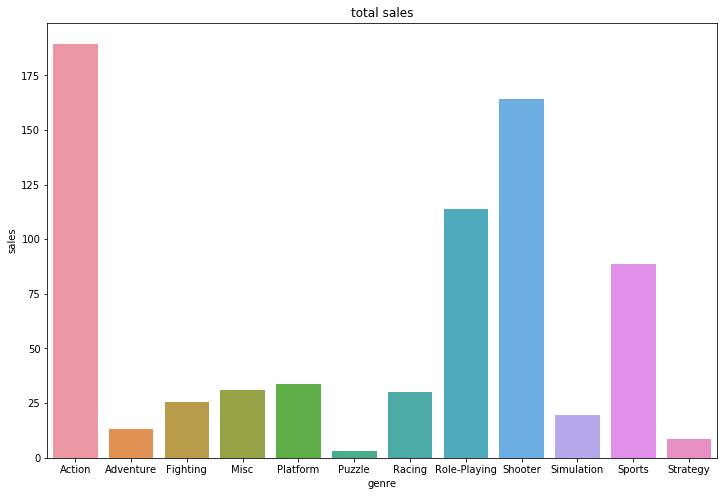

In [24]:
plt.figure(figsize=(12,8))
sns.barplot(data=df.groupby(['genre']).sales.sum().reset_index(),
              x='genre',
              y='sales').set_title('total sales');

<div style="border:solid gold 2px; padding: 20px"> 
    
**Комментарий ревьюера - 3**

**#можно лучше**

Здесь ты все правильно отобразил, но стоило отранжировать столбики. Это всегда полезно делать, когда категорий (в данном случае жанров) больше 5 и тем более больше 10. Тогда сравнивать на глаз столбики с разных частей диаграммы трудно. Даже сетка не всегда помогает, а сортировка сразу покажет кто больше, а кто меньше.
    
</div>

## Анализ данных

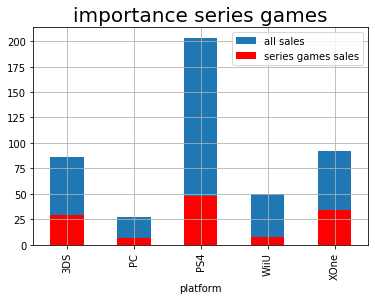

In [25]:
df2 = df.groupby(['series_name',
                 'genre',
                 'platform']).agg({'sales': 'mean',
                                   'name': 'count'}).sort_values('sales',
                                                                 ascending=False)
df2.groupby('platform').sales.sum().plot(kind='bar',
                                        label='all sales')

df2.query("name>1").groupby('platform').sales.sum().plot(kind='bar',
                                                         color='r',
                                                         label='series games sales')
plt.legend()
plt.grid()
plt.title('importance series games', fontsize=20);


Серийные игры действительно занимают значительную долю в продажах.

In [26]:
top_sales = {}
# словарь датафреймов с самыми популярными сериями игр в регионе
top_sales_one = {}
# словарь датафреймов с самыми популярными уникальными играми в регионе
regions = ['na', 'eu', 'jp', 'other']
for r in regions:
  top_sales[r] = df.groupby(['series_name', 'genre', 'platform'])\
                  .agg({f'{r}_sales': 'mean', 'name': 'count'})\
                  .sort_values(f'{r}_sales', ascending=False)\
                  .query("name>1")
  top_sales_one[r] = df.groupby(['series_name', 'genre', 'platform'])\
                  .agg({f'{r}_sales': 'mean', 'name': 'count'})\
                  .sort_values(f'{r}_sales', ascending=False)\
                  .query("name==1")

Рассмотрим самые популярные игровые франшизы

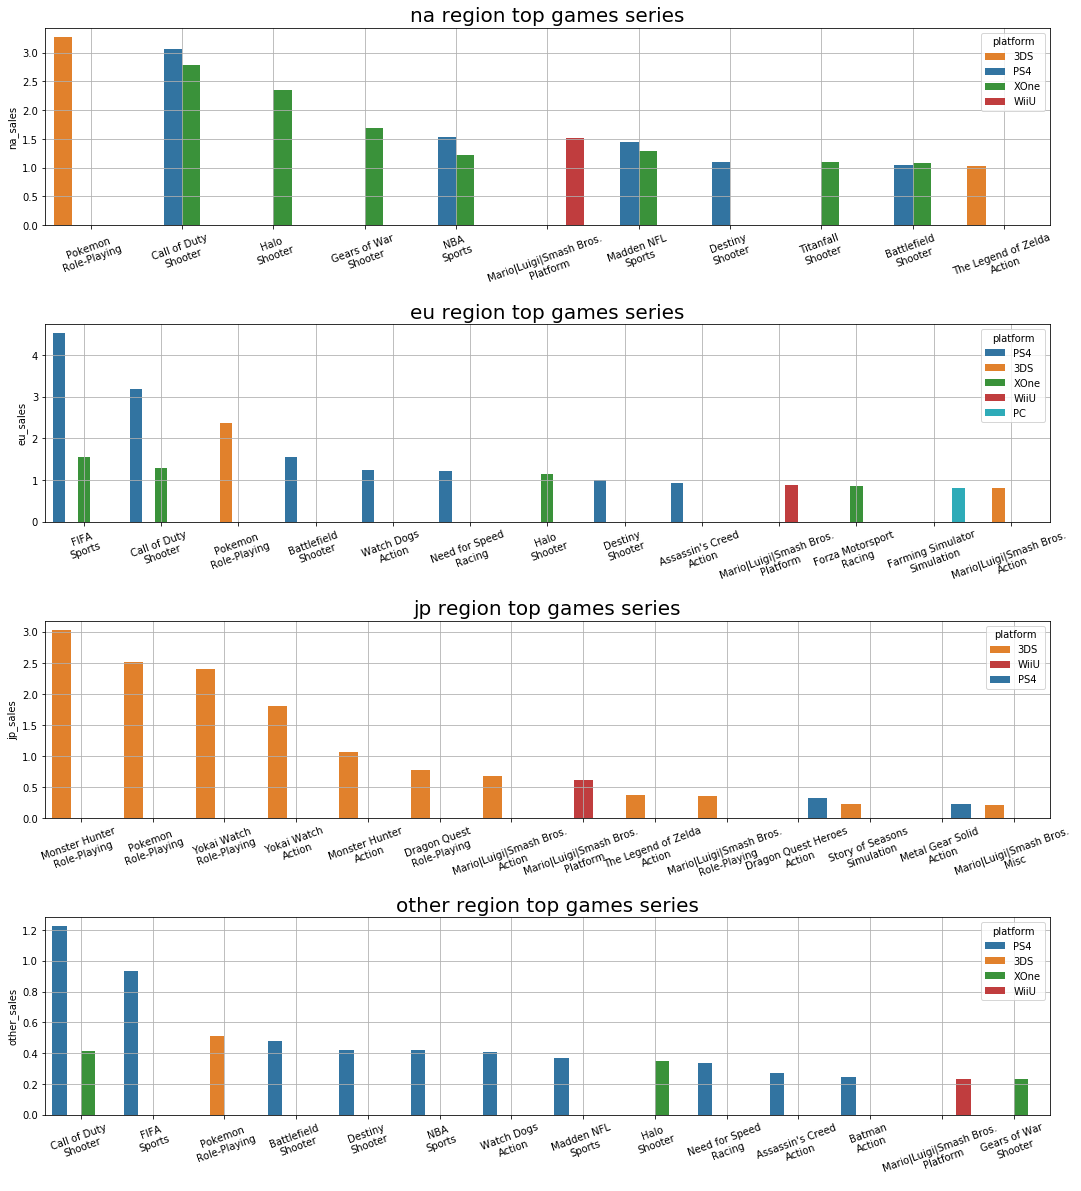

In [27]:
f, axs = plt.subplots(len(regions), 1, figsize=(18,20))
axs = axs.ravel()
plt.subplots_adjust(hspace=0.5)
palette = {'PS4': 'tab:blue',
           'XOne': 'tab:green',
           '3DS': 'tab:orange',
           'WiiU': 'tab:red',
           'PC': 'tab:cyan',}

for i,reg in enumerate(regions):
  #plt.xticks(rotation=15)
  data = top_sales[reg].reset_index().query(f"{reg}_sales>{reg}_sales.quantile(0.9)")
  sns.barplot(ax=axs[i],
              data=data,
              x=data.series_name+'\n'+data.genre,
              y=f'{reg}_sales',
              hue='platform',
              palette=palette).set_title(f'{reg} region top games series',
                                         fontsize = 20)
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=20)
  axs[i].xaxis.grid(True)
  axs[i].yaxis.grid(True)

А теперь рассмотрим самые популярные уникальные игры за рассматриваемый период

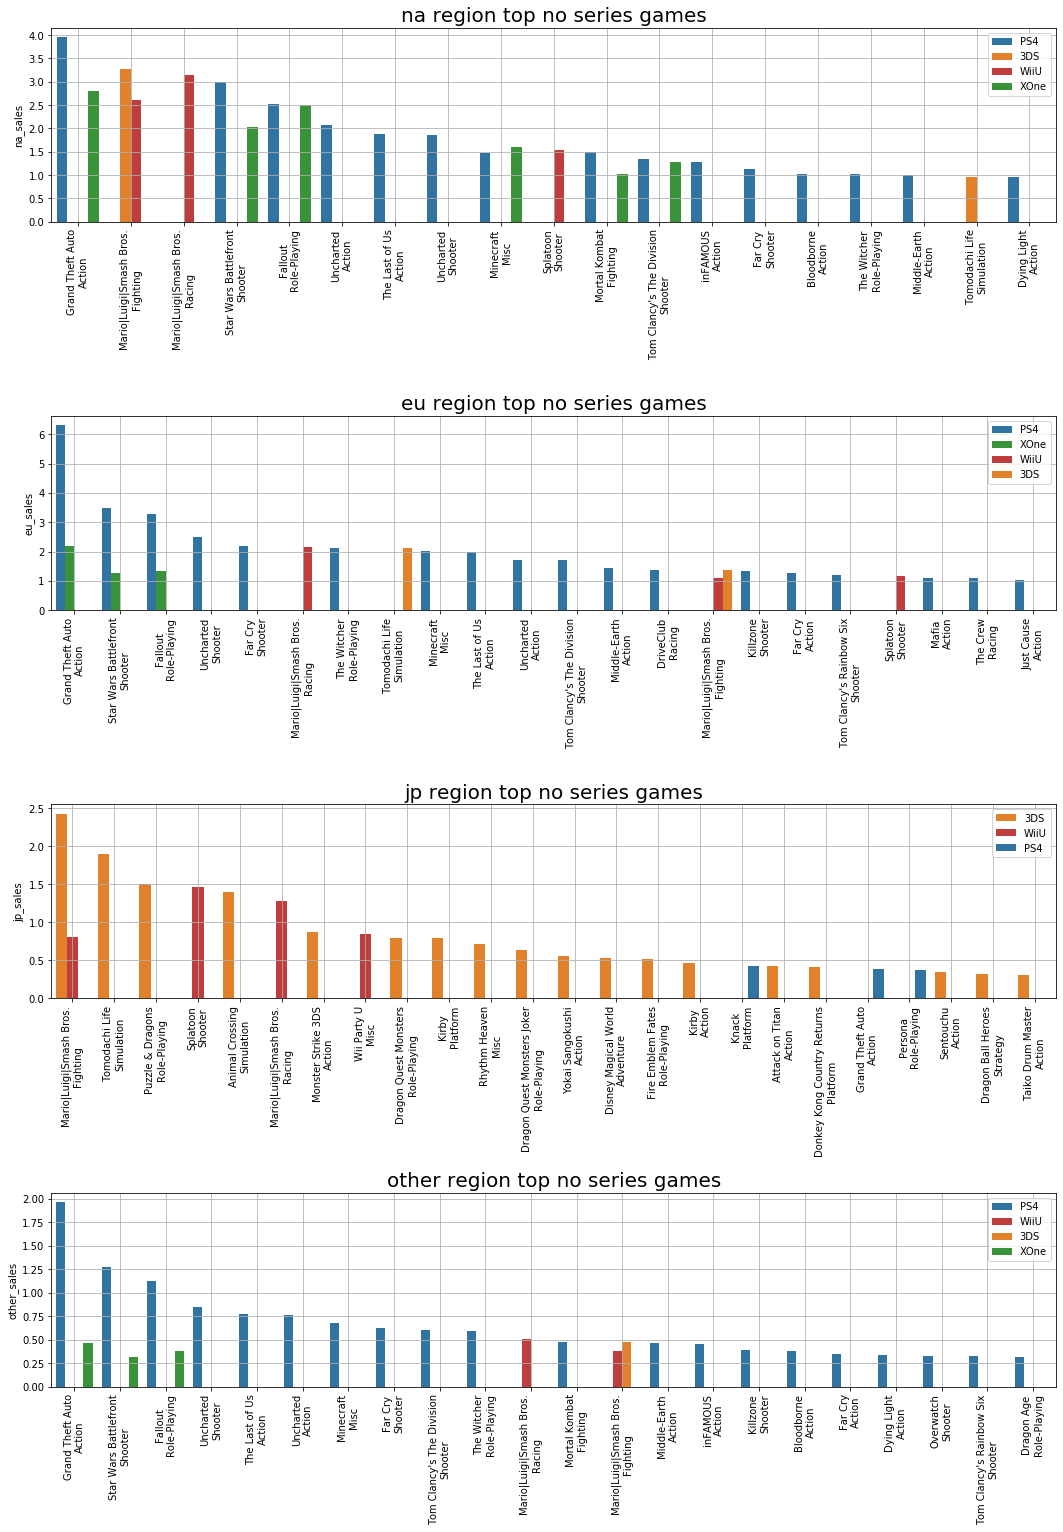

In [28]:
f, axs = plt.subplots(len(regions), 1, figsize=(18,25))
axs = axs.ravel()
plt.subplots_adjust(hspace=1)
palette = {'PS4': 'tab:blue',
           'XOne': 'tab:green',
           '3DS': 'tab:orange',
           'WiiU': 'tab:red',
           'PC': 'tab:cyan',}

for i,reg in enumerate(regions):
  #plt.xticks(rotation=15)
  data = top_sales_one[reg].reset_index().query(f"{reg}_sales>{reg}_sales.quantile(0.97)")
  sns.barplot(ax=axs[i],
              data=data,
              x=data.series_name+'\n'+data.genre,
              y=f'{reg}_sales',
              hue='platform',
              palette=palette).set_title(f'{reg} region top no series games',
                                         fontsize = 20)
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
  axs[i].legend(loc='upper right')
  axs[i].xaxis.grid(True)
  axs[i].yaxis.grid(True)

Так как вынужденный метод для группировки данных по франшизам оказался не идеальным, большое количество игр с циклом разработки продолжений более 4 лет оказались в данном топе. Но это дополнительно показывает значимость игровой репутации в современном игрострое.

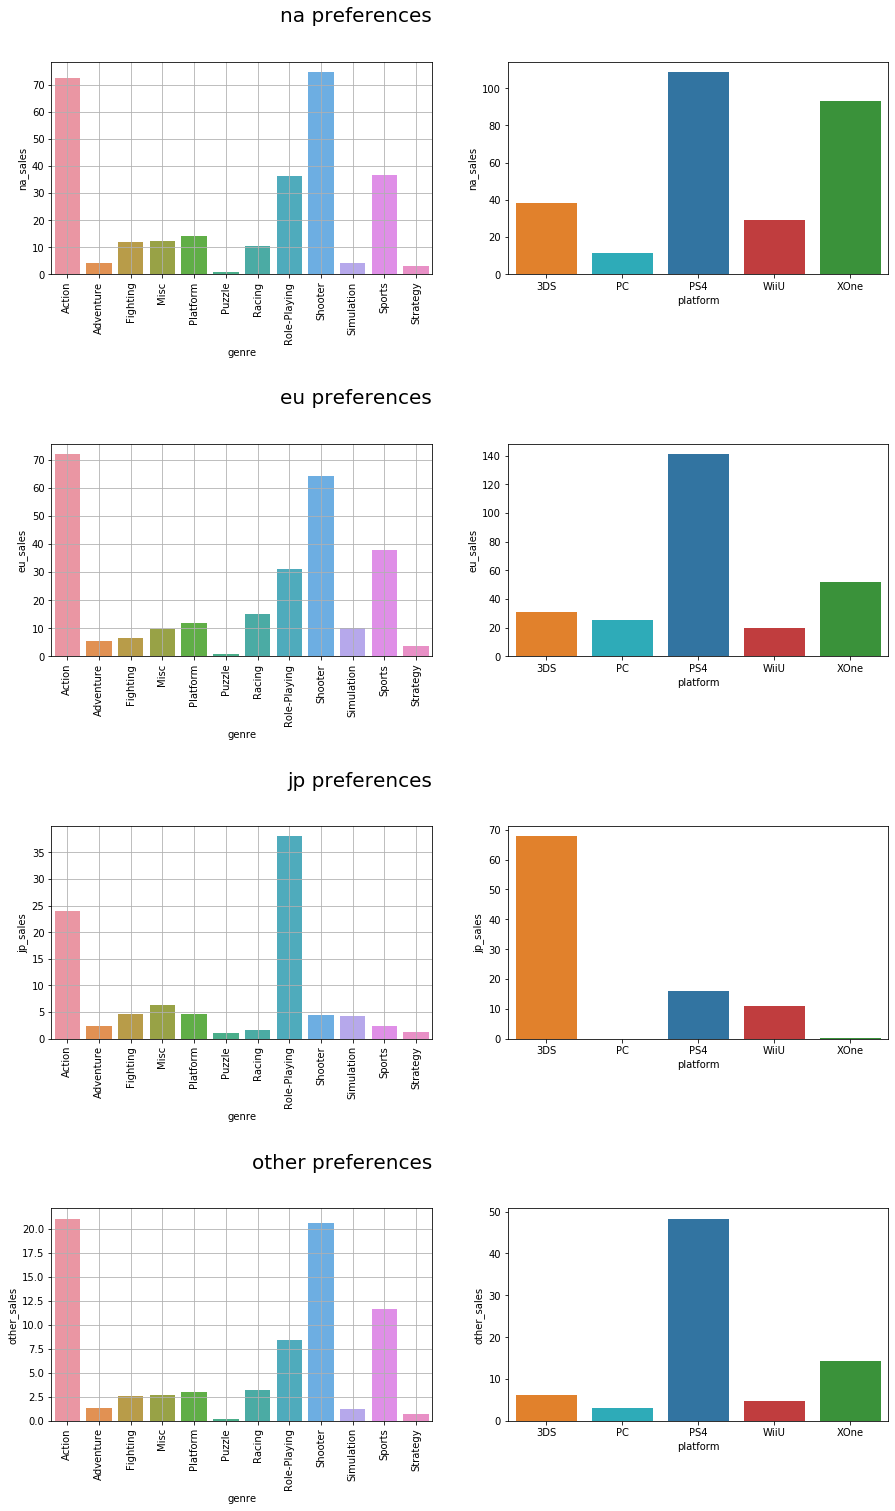

In [29]:
f, axs = plt.subplots(len(regions), 2, figsize=(15,25))
axs = axs.ravel()
plt.subplots_adjust(hspace=0.8)
palette = {'PS4': 'tab:blue',
           'XOne': 'tab:green',
           '3DS': 'tab:orange',
           'WiiU': 'tab:red',
           'PC': 'tab:cyan',}
i=-1
for reg in regions:
  i+=1
  sns.barplot(ax=axs[i], data=df.groupby(['genre'])[f'{reg}_sales'].sum().reset_index(),
              x='genre',
              y=f'{reg}_sales').set_title(f'{reg} preferences',
                                          fontsize = 20,
                                          loc='right',
                                          pad = 40)
  
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
  axs[i].xaxis.grid(True)
  axs[i].yaxis.grid(True)

  i+=1
  sns.barplot(ax=axs[i], data=df.groupby(['platform'])[f'{reg}_sales'].sum().reset_index(),
              x='platform',
              y=f'{reg}_sales',
              palette=palette)

Стоит считаться с тем, что игровые предпочтения Японии кардинально отличаются от остального мира.

Для окончательных выводов осталось взглянуть на масштаб рынков разбитых по регионам

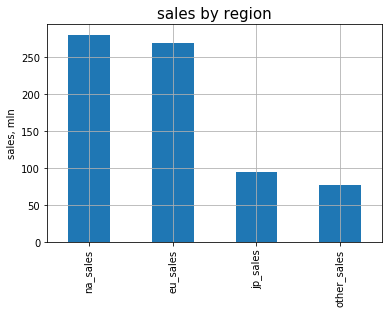

In [30]:
plt.title('sales by region', fontsize=15)
plt.ylabel('sales, mln')
df.loc[:,['na_sales',
          'eu_sales',
          'jp_sales',
          'other_sales']].sum().plot(kind='bar', grid=True);

<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#ошибка**

Хороший, яркий анализ, но нужно ответить на вопросы из задания

        Влияет ли рейтинг ESRB на продажи в отдельном регионе?
    
</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА:</b>


Свое мнение о рейтинге я также изложил еще в начале:
<code>    
*Рейтинг же игры, тем более с таким количеством пропусков, в мире где даже возрастные ограничения на продажу табака и алкоголя не являются значительными трудностями. Не отображает ничего кроме наличие возни, чтобы снова угодить горске людей которые не играют в игры.*
</code>
Выдающиеся значения в играх для детей, 18+ или без ограничений вызывают только ложные выводы, что люди любят игры с зверюшками или с кровью. Эти зависимости возникают только из-за того, что пользователи предпочитают игры про Покемонов, Марио, GTA или FIFA. Поменяют завтра рейтинг Call of Duty на "игры для детей" и это не приведет к тому, что американцы полюбят все игры для детей. Рейтинг игры волнует только тех, кто получает зарплату за эти ограничения.
</div>

<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

**#ошибка**
    
Твое мнение должно быть подкреплено какими-то расчетами и диаграммами. От тебя требуется статистическая аналитика, а не бытовые рассуждения 

</div>

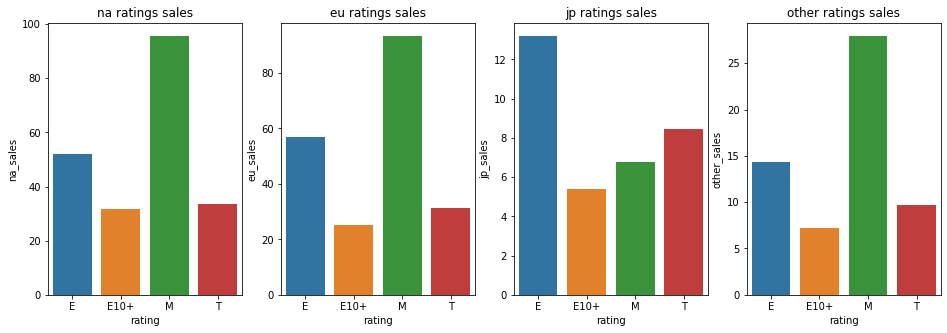

In [31]:
f, axs = plt.subplots(1, 4, figsize=(16,5))
axs = axs.ravel()
for i,reg in enumerate(regions):
  sns.barplot(ax=axs[i], data=df.groupby(['rating'])[f'{reg}_sales'].sum().reset_index(),
              x='rating',
              y=f'{reg}_sales').set_title(f'{reg} ratings sales')

«E» («Everyone») — «Для всех»  
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»  
«M» («Mature») — «Для взрослых»  
«T» («Teen») — «Подросткам»


<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 3**

**#ок**

Отлично, все верно.
    
</div>

## Проверка гипотез

###  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

H0 - средние пользовательские рейтинги платформ Xbox One и PC равны  
H1 - средние пользовательские рейтинги платформ Xbox One и PC не равны

Для более корректного сравнения возьмет оценки тех игр, которые были представленны как на платформе Xbox One, так и на платформе PC 

In [32]:
multiplatform_games = df.query("platform in ['XOne', 'PC']")\
                        .groupby('name')\
                        .agg({'user_score': 'count'})\
                        .query("user_score>1")\
                        .index

In [33]:
df_for_g1 = df.query("(name in @multiplatform_games) & (platform in ['XOne', 'PC'])")

In [34]:
print(f'''Средняя пользовательская оценка игре на XOne: \
{df_for_g1[df_for_g1.platform == 'XOne'].user_score.mean():.2f}''')
print(f'''Средняя пользовательская оценка игре на PC: \
{df_for_g1[df_for_g1.platform == 'PC'].user_score.mean():.2f}''')
print('(Использовались игры из списка мультиплатформенных игр выпущенных как на XOne так и PC)')
print(f'''\nРазница статистически значима, так как p-value < 0.05 и равно \
{stats.ttest_ind(df_for_g1[df_for_g1.platform == 'XOne'].user_score,
                df_for_g1[df_for_g1.platform == 'PC'].user_score).pvalue:.3f}''')

Средняя пользовательская оценка игре на XOne: 6.71
Средняя пользовательская оценка игре на PC: 6.14
(Использовались игры из списка мультиплатформенных игр выпущенных как на XOne так и PC)

Разница статистически значима, так как p-value < 0.05 и равно 0.019


Из-за низкой покупательской способности PC-геймеры довольствуются остатками приоритетов.  
Различия в датах релиза, проблемы с запуском, даунгрейд графики откладывают отпечаток общую оценку игры.

### Средние пользовательские рейтинги жанров Action и Sports разные.

H0 - средние пользовательские рейтинги жанров Action и Sports равны  
H1 - средние пользовательские рейтинги жанров Action и Sports не равны

In [35]:
print(f'''Средняя пользовательская оценка игре жанра Action: \
{df[df.genre == 'Action'].user_score.mean():.2f}''')
print(f'''Средняя пользовательская оценка игре жанра Sports: \
{df[df.genre == 'Sports'].user_score.mean():.2f}''')

print(f'''\nРазница статистически значима, так как p-value = \
{stats.ttest_ind(df[(df.genre == 'Action') & (~df.user_score.isna())].user_score,
                df[(df.genre == 'Sports') & (~df.user_score.isna())].user_score).pvalue}''')

Средняя пользовательская оценка игре жанра Action: 6.82
Средняя пользовательская оценка игре жанра Sports: 5.56

Разница статистически значима, так как p-value = 3.50603346485313e-13


Тяжело придумывать что-то новое каждый год в играх правилам которых уже сотни лет...  
(а может и не стоит раз они итак отлично продаются)

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#ок**

Гипотезы сформулированы и проверены правильно.
    
</div>

## Выводы

1. В первую очередь стоит обратить внимание на потребление игрового контента по регионам.  
 75% всех проданных игр были приобретены в Североамериканском и Европейском регионах.  

2. Большая часть игр приобретается для консолей нового поколения.  
  2.1. Для Североамериканского региона 60% игр покупаются на консоли PS4 и XOne  
  2.2. Для Японии 70% купленных игр прихотся на приставку 3DS и только 20% у PS4  
  2.3.  Во всем остальном мире 60% игровой индустрии принадлежит PS4    

3. Игры которые вероятней всего будут популярными в будущем и на которые с минимальным риском можно сделать ставку, относятся к уже зарекомендовавшим себя сериям игр. Список самых популярных из них отображен в работе на графиках. К ним относятся игры таких серий как FIFA, Call of Duty, Pokemon, Mario, GTA, Star Wars и др.

4. Самыми популярными жанрами для Японии являются Action и RP. Для всего остального мира Action, RP, Shooter и Sport

5. Гипотеза о том, что пользовательские рейтинги игр не зависят от того вышла она на PC или XOne не подтвердилась

6. Гипотеза о том, что пользовательские рейтинги игр зависят от того, что это игра жанра Action или Sports подтвердилась

<div style="border:solid green 2px; padding: 20px"> 

**Общий комментарий по проекту**

Ты отлично поработал над проектом, молодец. У тебя получился очень яркий и наглядный статистический анализ. 

В целом ты отлично справляешься с программой. 
    
Поправь, пожалуйста небольшие неточности, чтобы я могла приянть проект. Да, можно творчески подходить к анализу, но обязательно должны быть ответы на все вопросы из задания.
    
Удачи.
</div>

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 3**

**#ок**

Ответы на все вопросы даны, все отлично, замечаний нет. Ты здорово освоил инструменты визуализации, молодец.
    
</div>